<a href="https://colab.research.google.com/github/Evans-Junior/17._SportsPrediction/blob/master/Group17_SportsPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing libraries for use
import pandas as pd,numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
# Mounting the drive to access FIFA 21 Player Dataset
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Reading data from the FIFA 21 Player Dataset
df=pd.read_csv("/content/drive/My Drive/AI/players_21.csv")


## **Data Cleaning**

In [6]:
# Dropping columns with 30% or more null values
df.dropna(thresh= 0.3 * len(df), axis=1, inplace=True)

df.head()


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lb,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,62+3,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,61+3,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,61+3,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,62+3,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,75+3,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/flags/be.png


In [7]:
# Remove unwanted and irrelevant data
# Dropping Columns
for column in df:
  if "_id"  in column:
    df.drop(column,axis=1, inplace=True)
  if "url"  in column:
      df.drop(column,axis=1, inplace=True)


unnecessary=["real_face","ls","st","rs","short_name","long_name","lb","lcb","club_jersey_number","release_clause_eur","cb","rcb","rb","gk","dob","league_name","lcm","cm","rcm","rm","lwb","ldm","cdm","rdm","rwb","lb","club_contract_valid_until","lw","lf","cf","rf","rw","lam","cam","ram","lm","lcm"]

df=df.drop(columns=unnecessary)

df.head()
# columns_to_drop

,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,league_level,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,"RW, ST, CF",93,93,103500000.0,560000.0,33,170,72,FC Barcelona,1.0,...,75,96,32,35,24,6,11,15,14,8
1,"ST, LW",92,92,63000000.0,220000.0,35,187,83,Juventus,1.0,...,84,95,28,32,24,7,11,15,14,11
2,ST,91,91,111000000.0,240000.0,31,184,80,FC Bayern München,1.0,...,88,88,35,42,19,15,6,12,8,10
3,"LW, CAM",91,91,132000000.0,270000.0,28,175,68,Paris Saint-Germain,1.0,...,92,93,35,30,29,9,9,15,15,11
4,"CAM, CM",91,91,129000000.0,370000.0,29,181,70,Manchester City,1.0,...,84,91,68,65,53,15,13,5,10,13


In [8]:
# Getting numeric data to work on
numeric_df = df.select_dtypes(include='number')
numeric_df.isnull().sum()

# Cleaning the dataset of all null values
columns_with_nans = numeric_df.columns[numeric_df.isna().any()].tolist()
numeric_df=numeric_df.drop(columns=columns_with_nans)


In [9]:
# Filling all missing values using the median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_imputed = imputer.fit_transform(df[columns_with_nans])
df_imputed = pd.DataFrame(df_imputed, columns=columns_with_nans)

# Drop it from numeric dataset
numeric_df.loc[:,"power_long_shots":"mentality_penalties"]

,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties
0,94,44,40,93,95,75
1,93,63,29,95,82,84
2,85,81,49,94,79,88
3,84,51,36,87,90,92
4,91,76,66,88,94,84
...,...,...,...,...,...,...
18939,23,44,50,25,25,35
18940,29,58,42,32,53,35
18941,34,57,35,48,44,36
18942,41,33,11,43,49,50


In [10]:
# Adding imputed dataframe to numeric dataframe
numeric_df = pd.concat([numeric_df,df_imputed],axis=1)

#Confirming for the null values
numeric_df.isnull().sum()

overall                        0
potential                      0
age                            0
height_cm                      0
weight_kg                      0
weak_foot                      0
skill_moves                    0
international_reputation       0
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_short_passing        0
attacking_volleys              0
skill_dribbling                0
skill_curve                    0
skill_fk_accuracy              0
skill_long_passing             0
skill_ball_control             0
movement_acceleration          0
movement_sprint_speed          0
movement_agility               0
movement_reactions             0
movement_balance               0
power_shot_power               0
power_jumping                  0
power_stamina                  0
power_strength                 0
power_long_shots               0
mentality_aggression           0
mentality_interceptions        0
mentality_

**Working with non-numeric data**

In [11]:
# Working with only columns of the dataset that contain alphabets
alpha_df = df.select_dtypes(exclude='number')

# Checking for missing values
alpha_df.isnull().sum()

player_positions        0
club_name             225
club_position         225
club_joined           983
nationality_name        0
preferred_foot          0
work_rate               0
body_type               0
player_traits       10629
dtype: int64

In [12]:
# Get all columns with Nans
columns_with_nans = alpha_df.columns[alpha_df.isna().any()].tolist()
df_imputed = alpha_df.copy()

# Dropping columns with null values(Nans) from the dataset
alpha_df = alpha_df.drop(columns_with_nans, axis=1)

# Create a SimpleImputer with the 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values in the specified columns
df_imputed[columns_with_nans] = imputer.fit_transform(df[columns_with_nans])
df_imputed = pd.DataFrame(df_imputed, columns=columns_with_nans)

# Adding the imputed dataset back to the dataframe by concating
alpha_df=pd.concat([alpha_df,df_imputed],axis=1)
columns_with_nans

# Checking to confirm that there are no null values
alpha_df.isnull().sum()


player_positions    0
nationality_name    0
preferred_foot      0
work_rate           0
body_type           0
club_name           0
club_position       0
club_joined         0
player_traits       0
dtype: int64

**Label Encoding the 'alphabet' dataframe**

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to avoid modifying the original data
encoded_df = alpha_df.copy()

for col in alpha_df.columns:
    encoded_df[col] = label_encoder.fit_transform(alpha_df[col])

alpha_df=encoded_df


# **Working with the Cleaned Dataset**

In [14]:
# The cleaned data set is the relevantDataSet
relevantDataSet=pd.concat([alpha_df,numeric_df],axis=1)


*Find all the relevant data to the overall*


In [15]:
# Calculate the correlation matrix for overall
correlation_matrix = relevantDataSet.corr()['overall']

# Filter the correlations that meet your criteria (greater than 0.48 or less than -0.48) when compared to the overall column
# Reason for this decision
# # We decided to use a correlation range between -0.48 and 0.48 because it indicates a moderate linear relationship.
# # This means that as one variable increases or decreases, the other tends to move in the same general direction, but not necessarily in a perfectly linear way.
# # We believe that a correlation of -0.48 to 0.48 may not be extremely strong. It still provides valuable information for predictive modeling.
# # It suggests that there is some degree of association between the variables, and this association can be useful for making predictions.
# # Also to prevent multicollinearity. Moderate correlations are less likely to cause multicollinearity issues while still offering predictive power.
high_correlations = correlation_matrix[(correlation_matrix > 0.48) | (correlation_matrix < -0.48)]
high_correlations

overall                    1.000000
potential                  0.636366
attacking_short_passing    0.502191
skill_long_passing         0.487147
movement_reactions         0.867234
power_shot_power           0.558372
mentality_vision           0.509087
mentality_composure        0.705252
value_eur                  0.553449
wage_eur                   0.586851
passing                    0.660281
dribbling                  0.592937
physic                     0.489933
Name: overall, dtype: float64

In [16]:
df[high_correlations.index]

,overall,potential,attacking_short_passing,skill_long_passing,movement_reactions,power_shot_power,mentality_vision,mentality_composure,value_eur,wage_eur,passing,dribbling,physic
0,93,93,91,91,94,86,95,96,103500000.0,560000.0,91.0,95.0,65.0
1,92,92,82,77,95,94,82,95,63000000.0,220000.0,81.0,89.0,77.0
2,91,91,84,70,93,89,79,88,111000000.0,240000.0,78.0,85.0,82.0
3,91,91,87,81,91,80,90,93,132000000.0,270000.0,86.0,94.0,59.0
4,91,91,94,93,91,91,94,91,129000000.0,370000.0,93.0,88.0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47,52,31,25,48,35,25,40,70000.0,1000.0,26.0,27.0,48.0
18940,47,53,55,50,50,38,53,35,70000.0,1000.0,49.0,47.0,48.0
18941,47,47,56,56,44,49,44,35,45000.0,2000.0,49.0,46.0,59.0
18942,47,67,45,37,53,50,49,45,130000.0,500.0,40.0,53.0,40.0


*Our Graphical representations*

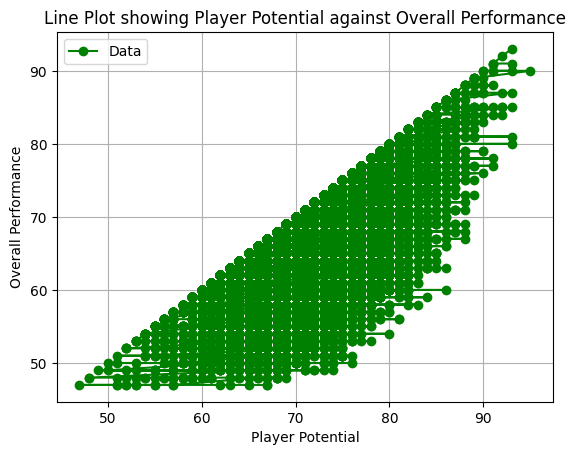

In [ ]:
#LINEPLOT TO REPRESENT CORRELATION

# Selecting the desired columns that tel
x = relevantDataSet['potential']
y = relevantDataSet['overall']

# Plotting
plt.plot(x, y, marker='o', linestyle='-', color='g', label='Data')

plt.xlabel('Player Potential')
plt.ylabel('Overall Performance')
plt.title('Line Plot showing Player Potential against Overall Performance')
plt.legend()
plt.grid(True)

plt.show()

# Interpretation: It is clearly seen that there is a strong positive linear relationship between the player potential and their potentials
# This means that a player with a low potential will directly have an overall low performance while a player with high potential will directly have an overall high performance

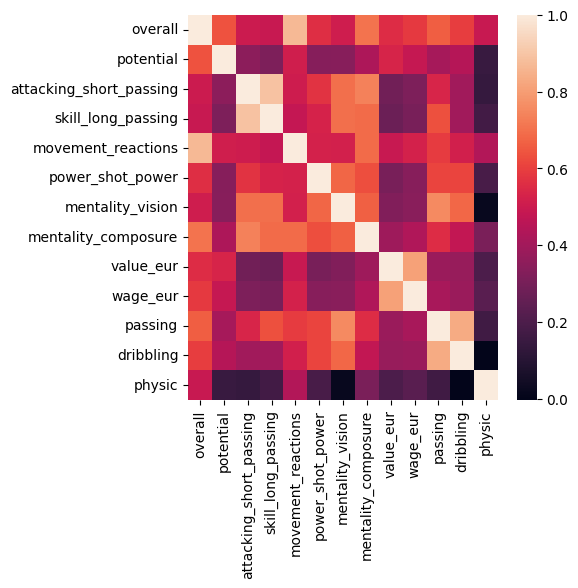

In [ ]:
# HEATMAP TO REPRESENT CORRELATION
heatmap_correlation = relevantDataSet[high_correlations.index].corr()
round(heatmap_correlation,2)
plt.figure(figsize=(5,5))
sns.heatmap(heatmap_correlation);

# Interpretation based on real-life scenario:
# Forwards: Forwards are most likely to have the skill moves "dribbling" and "attacking finishing". This makes sense, as forwards are responsible for scoring goals, and these skill moves help them to get past defenders and create scoring opportunities.
# Midfielders: Midfielders are most likely to have the skill moves "dribbling" and "passing". This makes sense, as midfielders are responsible for connecting the defense and attack, and these skill moves help them to move the ball past defenders and create scoring opportunities for their teammates.
# Defenders: Defenders are most likely to have the skill moves "defending standing tackle" and "defending sliding tackle". This makes sense, as defenders are responsible for preventing the opposition from scoring goals, and these skill moves help them to win the ball back from attackers.
# It is also worth noting that the skill move "dribbling" is the most common skill move among players in all positions. This suggests that dribbling is a fundamental skill for all soccer players to have, regardless of their position.

# Overall, the heatmap provides a useful overview of the distribution of skill moves among soccer players in different positions.

# **Scaling the cleaned data set**

In [ ]:
# Scaling the columns to make better to prediciton
sc = StandardScaler()

# Finding scaler of relevantDataSet values without 'overall' which is the dependent variable
scaled = sc.fit_transform(relevantDataSet[high_correlations.index].loc[:,"potential":])
xtrain21scaled=sc


In [ ]:
# Create a new dataFrame of the scaled dataset with the high correlations
sub_set_data = pd.DataFrame(scaled,columns=relevantDataSet[high_correlations.index].loc[:,"potential":].columns)
sub_set_data

,potential,attacking_short_passing,skill_long_passing,movement_reactions,power_shot_power,mentality_vision,mentality_composure,value_eur,wage_eur,passing,dribbling,physic
0,3.586563,2.216206,2.522017,3.554438,2.119026,3.000047,3.137573,13.071234,27.845078,3.482519,3.410670,0.040355
1,3.422893,1.598583,1.601260,3.664174,2.719163,2.052781,3.055051,7.810099,10.660644,2.451148,2.778572,1.343624
2,3.259222,1.735833,1.140882,3.444701,2.344077,1.834181,2.477402,14.045519,11.671493,2.141737,2.357173,1.886654
3,3.259222,1.941707,1.864334,3.225227,1.668922,2.635714,2.890009,16.773515,13.187767,2.966834,3.305320,-0.611280
4,3.259222,2.422080,2.653554,3.225227,2.494112,2.927180,2.724966,16.383801,18.242012,3.688793,2.673222,1.452230
...,...,...,...,...,...,...,...,...,...,...,...,...
18939,-3.123941,-1.901280,-1.818694,-1.493455,-1.706851,-2.100615,-1.483625,-0.364795,-0.408153,-3.221388,-3.753112,-1.805945
18940,-2.960270,-0.254285,-0.174485,-1.273981,-1.481799,-0.060350,-1.896232,-0.364795,-0.408153,-0.849236,-1.646118,-1.805945
18941,-3.942295,-0.185661,0.220125,-1.932402,-0.656610,-0.716150,-1.896232,-0.368043,-0.357611,-0.849236,-1.751467,-0.611280
18942,-0.668878,-0.940533,-1.029474,-0.944771,-0.581593,-0.351817,-1.071018,-0.357001,-0.433425,-1.777469,-1.014019,-2.674791


*Defining xtrain as x and ytrain as y for further training*

In [ ]:
x = sub_set_data
y = relevantDataSet['overall']

# **Cleaning the test dataset for prediction from the FIFA 22  Player dataset**

In [ ]:
# Generating the xtest and ytest

# Using the fifa players data for 2022
df2 = pd.read_csv("/content/drive/My Drive/AI/players_22.csv")
relevantDataSet2 = df2[high_correlations.index]

# Dropping columns with 30% or more null values
relevantDataSet2.dropna(thresh= 0.3 * len(df2), axis=1, inplace=True)

# WORKING WITH THE NUMBERS JUST AS THE FIFA 21 PLAYER DATASET
numeric_df = relevantDataSet2.select_dtypes(include='number')
columns_with_nans = numeric_df.columns[numeric_df.isna().any()].tolist()

# Dropping columns with null values (Nans)
numeric_df = numeric_df.drop(columns=columns_with_nans)
imputer = SimpleImputer(strategy="median")

# Imputing the data
df_imputed = imputer.fit_transform(relevantDataSet2[columns_with_nans])
df_imputed = pd.DataFrame(df_imputed, columns=columns_with_nans)

# Concating the imputed dataframe with the numeric dataframe
numeric_df = pd.concat([numeric_df,df_imputed],axis=1)

# Since all our data is numerical
relevantDataSet2 = numeric_df

# Scaling the columns to make better to prediciton
sc = StandardScaler()

# Finding scaler of relevantDataSet values without overall
scaled = sc.fit_transform(relevantDataSet2.loc[:,"potential":])
scaled

# Creating a new dataFrame of the Scaled Dataset
sub_set_data2=pd.DataFrame(scaled,columns=relevantDataSet2.loc[:,"potential":].columns)
sub_set_data2.shape


<ipython-input-159-ccbd851223a2>:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("/content/drive/My Drive/AI/players_22.csv")
<ipython-input-159-ccbd851223a2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevantDataSet2.dropna(thresh= 0.3 * len(df2), axis=1, inplace=True)


(19239, 12)

*Defining our xtest and ytest for further prediction from 2022*

In [ ]:
xtest = sub_set_data2
ytest = relevantDataSet2['overall']

# **Importing modules for our training and predictions**

In [ ]:
# Using ensembling on Regression
from sklearn.ensemble import VotingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_predict
import statsmodels.api as sm
from scipy import stats


**Splitting our training dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


*Using RandomForest Regression technique*

In [ ]:
random_forest = RandomForestRegressor()
svr = SVR()
xgb_model = XGBRegressor(base_score=0.5, booster='gblinear', n_estimators=100, learning_rate=0.1, random_state=42)
decision_tree = DecisionTreeRegressor(max_depth=10)

In [ ]:
# Number of folds
cv=KFold(n_splits=2)
param_gridRandomForest  = {
    'n_estimators': [300,400,600],
    'max_depth': [100, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'max_features': [ 'sqrt', 'log2']
}

param_gridSvr = {
    'C': [10, 30,60],
    'epsilon': [0.1, 0.01, 0.001],
    'kernel': ['rbf', 'sigmoid']
}

param_gridXgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 10, 30],
    'n_estimators': [ 200, 300,1000]
}

param_gridDt = {
    'max_depth': [200,1000],
    'min_samples_leaf': [8, 16]
}

Structure of our model to be used in the VotingRegressor

In [ ]:
voting_regressor = VotingRegressor(estimators=[
    ('random_forest', random_forest),
    ('svr', svr),
    ('xgb_model', xgb_model),
    ('decision_tree',decision_tree)
])


In [ ]:
prediction_intervals = []

Performing Fits, Predicitons and finding the Mean Squared Errors(MSE) and fine tunning MSE for each regressors used on the test data from split

In [ ]:
for rgr in ( random_forest,svr,xgb_model,decision_tree, voting_regressor):
 rgr.fit(x_train, y_train)
 # Fit a linear regression model
 model = sm.OLS(y_train, sm.add_constant(x_train))
 results = model.fit()
 y_pred = rgr.predict(x_test) #Predict
 mae = mean_absolute_error(y_test, y_pred) # Calculate MAE

 # Calculate the margin of error for prediction intervals
 alpha = 0.95  # Set the confidence level (e.g., 95%)
 n = len(x_train)
 mse = mean_squared_error(y_test, y_pred)
 std_err = np.sqrt(mse)
 t_score = stats.t.ppf(1 - (1 - alpha) / 2, df=n - 2)  # T-score for a two-tailed test
 margin_error = t_score * std_err

 # Calculate lower and upper bounds for the prediction interval
 lower_bound = y_pred - margin_error
 upper_bound = y_pred + margin_error

 # Append results to arrays
 prediction_intervals.append((lower_bound, upper_bound))


 print("Using the",rgr.__class__.__name__,"\n Mean Absolute Error (MAE):", mae)
 print(" Prediction Accuracy:","{:.2f}%".format(100*r2_score(y_test, y_pred)))
 print(" Prediction Interval:", (lower_bound[0], upper_bound[0]))
 print(" ")

Using the RandomForestRegressor 
 Mean Absolute Error (MAE): 0.6829955133280549
 Prediction Accuracy: 97.33%
 Prediction Interval: (57.70059885861481, 62.09940114138519)
 
Using the SVR 
 Mean Absolute Error (MAE): 1.2045842355602439
 Prediction Accuracy: 93.32%
 Prediction Interval: (57.316770871996596, 64.27352796213175)
 
Using the XGBRegressor 
 Mean Absolute Error (MAE): 1.9778283391787905
 Prediction Accuracy: 86.48%
 Prediction Interval: (56.523445, 66.420166)
 
Using the DecisionTreeRegressor 
 Mean Absolute Error (MAE): 0.9416368579631653
 Prediction Accuracy: 94.96%
 Prediction Interval: (56.97783807826953, 63.02216192173047)
 
Using the VotingRegressor 
 Mean Absolute Error (MAE): 0.9862382486866937
 Prediction Accuracy: 96.05%
 Prediction Interval: (57.89663592386006, 63.24243094165445)
 


Performing fits, Predictions and finding the Mean Squared Errors (MSE) and fine tuning the MSE for each regressors used on the 2022 dataset

In [ ]:
prediction_intervals = []

In [ ]:
for rgr in ( random_forest,svr,xgb_model,decision_tree, voting_regressor):
 rgr.fit(x_train, y_train)
 y_pred = rgr.predict(xtest) # Predict from the test data
 mae = mean_absolute_error(ytest, y_pred) # Calculate the Mean Absolute Error
  # Calculate the margin of error for prediction intervals
 alpha = 0.95  # Set the confidence level (e.g., 95%)
 n = len(x_train)
 mse = mean_squared_error(ytest, y_pred)
 std_err = np.sqrt(mse)
 t_score = stats.t.ppf(1 - (1 - alpha) / 2, df=n - 2)  # T-score for a two-tailed test
 margin_error = t_score * std_err

 # Calculate lower and upper bounds for the prediction interval
 lower_bound = y_pred - margin_error
 upper_bound = y_pred + margin_error

 # Append results to arrays
 prediction_intervals.append((lower_bound, upper_bound))
 print("Using the",rgr.__class__.__name__,"\n Mean Absolute Error (MAE):", mae)
 print(" Prediction Accuracy:","{:.2f}%".format(100*r2_score(ytest, y_pred)))
 print(" Prediction Interval:", (lower_bound[0], upper_bound[0]))

 print(" ")



Using the RandomForestRegressor 
 Mean Absolute Error (MAE): 0.640285357866833
 Prediction Accuracy: 97.54%
 Prediction Interval: (87.3443557797779, 91.57564422022209)
 
Using the SVR 
 Mean Absolute Error (MAE): 1.1758245212695408
 Prediction Accuracy: 93.97%
 Prediction Interval: (70.57911008908549, 77.20234380783232)
 
Using the XGBRegressor 
 Mean Absolute Error (MAE): 1.8839412060465026
 Prediction Accuracy: 87.51%
 Prediction Interval: (93.83755, 103.36782)
 
Using the DecisionTreeRegressor 
 Mean Absolute Error (MAE): 0.9082261512869017
 Prediction Accuracy: 95.28%
 Prediction Interval: (88.07086920357199, 93.92913079642801)
 
Using the VotingRegressor 
 Mean Absolute Error (MAE): 0.9516802145741109
 Prediction Accuracy: 96.33%
 Prediction Interval: (85.73767601116478, 90.90799569060374)
 


Fine-tuned models

Our model instantiations

In [ ]:
fine_tuned_random_forest = RandomForestRegressor(n_estimators=400, max_depth=100, random_state=82,n_jobs=-1)
fine_tuned_svr = SVR(kernel='rbf', C=10, epsilon=0.1)
fine_tuned_xgb_model = XGBRegressor(learning_rate=0.1, max_depth=10, n_estimators=200)
fine_tuned_decision_tree = DecisionTreeRegressor(max_depth=200, min_samples_leaf=8)

In [ ]:
grid_search_rf = GridSearchCV(fine_tuned_random_forest, param_grid=param_gridRandomForest, cv=cv, scoring="neg_mean_absolute_error")
grid_search_svr = GridSearchCV(fine_tuned_svr, param_grid=param_gridSvr, cv=cv,scoring="neg_mean_absolute_error")
grid_search_xgb = GridSearchCV(fine_tuned_xgb_model, param_grid=param_gridXgb, cv=cv,scoring="neg_mean_absolute_error")
grid_search_dt = GridSearchCV(fine_tuned_decision_tree, param_grid=param_gridDt, cv=cv,scoring="neg_mean_absolute_error")


"**XGB**" Model has been out performing all the other models so we decided to use it for the final prediction for 2022

We chose it because it had the smallest mean absolute error

Random_forest Model optimised

In [ ]:
# Perform cross-validation and get predictions
grid_search_rf.fit(x_train, y_train)
# Get the best model from grid search
best_model = grid_search_rf.best_estimator_
# Calculate MAE and R2 score on the test set
y_pred = best_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
r2 = round(r2_score(ytest, y_pred))
random_forest=best_model
print("Cross validation results:")
print(" Mean Absolute Error (MAE):", mae)
print(" Prediction Accuracy (R2):","{:.2f}%".format(100* r2))

Cross validation results:
 Mean Absolute Error (MAE): 0.8095685178891568
 Prediction Accuracy (R2): 100.00%


In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(random_forest.predict)

XGB Model optimised

In [ ]:
# Perform cross-validation and get predictions
grid_search_xgb.fit(x_train, y_train)
# Get the best model from grid search
best_model = grid_search_xgb.best_estimator_
# Calculate MAE and R2 score on the test set
y_pred = best_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
r2 = round(r2_score(ytest, y_pred))
xgb_model=best_model
print("Cross validation results:")
print(" Mean Absolute Error (MAE):", mae)
print(" Prediction Accuracy (R2):","{:.2f}%".format(100* r2))

Cross validation results:
 Mean Absolute Error (MAE): 0.7748203338063105
 Prediction Accuracy (R2): 100.00%


SVR Model

In [ ]:
# Perform cross-validation and get predictions
grid_search_svr.fit(x_train, y_train)
# Get the best model from grid search
best_model = grid_search_svr.best_estimator_
# Calculate MAE and R2 score on the test set
y_pred = best_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
r2 = round(r2_score(ytest, y_pred))
svr=best_model
print("Cross validation results:")
print(" Mean Absolute Error (MAE):", mae)
print(" Prediction Accuracy (R2):","{:.2f}%".format(100* r2))

Decision Tree

In [ ]:
grid_search_dt.fit(x_train, y_train)
# Get the best model from grid search
best_model = grid_search_dt.best_estimator_
y_pred = best_model.predict(xtest)
mae = mean_absolute_error(ytest, y_pred)
r2 = round(r2_score(ytest, y_pred))
decision_tree=best_model
print("Cross validation results:")
print(" Mean Absolute Error (MAE):", mae)
print(" Prediction Accuracy (R2):","{:.2f}%".format(100* r2))

Cross validation results:
 Mean Absolute Error (MAE): 0.8605213721773834
 Prediction Accuracy (R2): 100.00%


**Saving the models**

In [ ]:
with open("/content/drive/My Drive/AI/SavedModels/sport_model.sav", 'wb') as model_file:
    pickle.dump((xtrain21scaled,xgb_model), model_file)

print(f"Model saved as {model_file}")